In this notebook we choose the architecture and structure of our DNN

In [1]:
L=12
p=int(2**(L/2))
q=int((2**L)/4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'], 'size':15})
rc('text', usetex=True)

from __future__ import print_function
import keras,sklearn
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
PM_train_df = pd.read_csv ('PM_train_data.csv')
SG_train_df = pd.read_csv ('SG_train_data.csv')
THERM_train_df = pd.read_csv ('THERM_train_data.csv')

In [4]:
PM_train = PM_train_df.to_numpy()
SG_train = SG_train_df.to_numpy()
THERM_train = THERM_train_df.to_numpy()

In [5]:
# There are three possible outcomes
num_classes = 3
#train_test_ratio = 0.8

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = np.append(PM_train[0:800], SG_train[0:800], axis=0)
X_train = np.append(X_train, THERM_train[0:800], axis=0)

X_test= np.append(PM_train[800:1000], SG_train[800:1000], axis=0)
X_test = np.append(X_test, THERM_train[800:1000], axis=0)

Y_train = np.zeros(800)
Y_train = np.append(Y_train, np.ones(800))
Y_train = np.append(Y_train, 2*np.ones(800))

Y_test = np.zeros(200)
Y_test = np.append(Y_test, np.ones(200))
Y_test = np.append(Y_test, 2*np.ones(200))

# reshape data, depending on Keras backend
#X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
#X_train /= 255
#X_test /= 255

 #look at an example of data point
#print('an example of a data point with label', Y_train[20])
#plt.matshow(X_train[20,:].reshape(2**6,2**10),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')

X_train shape: (2400, 65536)
Y_train shape: (2400, 3)
X_test shape: (600, 65536)
Y_test shape: (600, 3)

2400 train samples


In [6]:
len(X_train[0])

65536

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(100,input_shape=(p*q,), activation='relu'))
    # add a dense all-to-all relu layer
    #model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [8]:
def compile_model(optimizer=tf.keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [9]:
# training parameters
batch_size = 64
epochs = 10

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - ETA: 0s - loss: 0.3396 - acc: 0.8650

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3396 - acc: 0.8650 - val_loss: 0.2902 - val_acc: 0.8850
Epoch 2/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2529 - acc: 0.9004 - val_loss: 0.2644 - val_acc: 0.9017
Epoch 3/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2375 - acc: 0.9104 - val_loss: 0.2661 - val_acc: 0.8967
Epoch 4/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2425 - acc: 0.9075 - val_loss: 0.2752 - val_acc: 0.8950
Epoch 5/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2326 - acc: 0.9137 - val_loss: 0.2589 - val_acc: 0.9000
Epoch 6/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2229 - acc: 0.9150 - val_loss: 0.2845 - val_acc: 0.8983
Epoch 7/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2303 - acc: 0.9075 - val_loss: 0.2702 - val_acc: 0.9017
Epoch 8/10
2400/2400 [==============================] - 4s 


Test loss: 0.28101033524920543
Test accuracy: 0.89666665


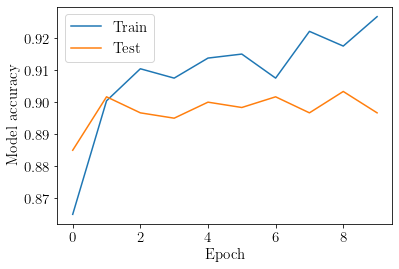

In [10]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.savefig('accuracy_model.png')
plt.show()


# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.ylabel('model loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='best')
#plt.show()
#plt.savefig('accuracy_model.png')

## Transfer learning

Let us now use the trained model to predict the phases in which other points in the phase space belong based on their entanglement spectrum

In [53]:
#range in delta and lambda space
delta_values = np.linspace(-1,1,11)
lambda_values = np.linspace(0,2,11)
pred_out = np.zeros([len(lambda_values), len(delta_values), num_classes])
for i,lambd in enumerate(lambda_values):
    for j,delta in enumerate(delta_values):    
        test_data_df = pd.read_csv('test_data/test_data_lambda={}_delta={}.csv'.format(np.round(lambd,2), np.round(delta,2)))
        test_data = test_data_df.to_numpy()
        prediction = model_DNN.predict(test_data)
        pred_out[i,j,:] = prediction
        
#This should give a prediction on the probability of being in a certain phase for a single instance,
#I did not have time to write it fr all instances and do averaging (I guess just average probabilities of being)
#in either phase over n 


        
        

1+1 

In [ ]:
d=[0,-1.,  -0.6, -0.2,  0.2, 0.6, 1. ]
l= [0,0, 0.4, 0.8, 1.2, 1.6, 2.0]

figure=plt.figure()
axes = figure.add_subplot(111)
caxes=axes.matshow(pred_out10)
axes.set_xticklabels(d)
axes.set_yticklabels(l)
axes.set_xlabel('$\delta$')
axes.set_ylabel('$\lambda$')
plt.gca().invert_yaxis()

plt.savefig('phase_diagram_n=30.png')

In [15]:
#range in delta and lambda space
n=30
delta_values = np.linspace(-1,1,11)
lambda_values = np.linspace(0,2,11)
pred_out10 = np.zeros([len(lambda_values), len(delta_values), num_classes])
count=0
for i,lambd in enumerate(lambda_values):
    for j,delta in enumerate(delta_values):
        test_data_df10 = pd.read_csv('test_data_n=30/test_data_lambda={}_delta={}.csv'.format(np.round(lambd,2), np.round(delta,2)))
        count+=1
        print(count)
        test_data10 = test_data_df10.to_numpy()
        prediction10 = model_DNN.predict(test_data10)
        pred_out10[i,j,:] = prediction10.mean(axis=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


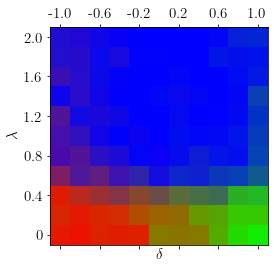

In [21]:
d=[0,-1.,  -0.6, -0.2,  0.2, 0.6, 1. ]
l= [0,0, 0.4, 0.8, 1.2, 1.6, 2.0]

figure=plt.figure()
axes = figure.add_subplot(111)
caxes=axes.matshow(pred_out10)
axes.set_xticklabels(d)
axes.set_yticklabels(l)
axes.set_xlabel('$\delta$')
axes.set_ylabel('$\lambda$')
plt.gca().invert_yaxis()

plt.savefig('phase_diagram_n=30.png')

In [139]:
n=30

test_data_df10 = pd.read_csv('test_data_n=30/test_data_lambda=0.0_delta=0.0.csv')
test_data10 = test_data_df10.to_numpy()

prediction10 = model_DNN.predict(test_data10)
pred_out10 = prediction10.mean(axis=0)

In [140]:
np.info(test_data10)
np.info(prediction10)
np.info(pred_out10)

class:  ndarray
shape:  (10, 65536)
strides:  (8, 80)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x25802d5b040
byteorder:  little
byteswap:  False
type: float64
class:  ndarray
shape:  (10, 3)
strides:  (12, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2582888ae00
byteorder:  little
byteswap:  False
type: float32
class:  ndarray
shape:  (3,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x25853a8ca20
byteorder:  little
byteswap:  False
type: float32


In [129]:
np.info(test_data10)
np.info(prediction)

class:  ndarray
shape:  (10, 65536)
strides:  (8, 80)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x25805a79040
byteorder:  little
byteswap:  False
type: float64
class:  ndarray
shape:  (1, 3)
strides:  (12, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x2580e951d00
byteorder:  little
byteswap:  False
type: float32


In [128]:
len(test_data10[0])

65536